# 1. 데이터 수집

In [69]:
import pandas as pd
train = pd.read_csv('C:\\Users\\polit\\Desktop\대학교 강의\\3학년 1학기 인공지능\\workspace\\3.24_Titanic\\train/train.csv')
test = pd.read_csv('C:\\Users\\polit\\Desktop\대학교 강의\\3학년 1학기 인공지능\\workspace\\3.24_Titanic\\train/test.csv')

# 2. 자료 분석

In [70]:
# 트레인 데이터
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 딕셔너리
    - survived : 생존=1, 죽음=0
    - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
    - sibsp : 함께 탑승한 형제 또는 배우자 수
    - parch : 함께 탑승한 부모 또는 자녀 수
    - ticket : 티켓 번호
    - cabin : 선실 번호
    - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
    
퍼스트 클래스의 가격은 3등급의 10배로 매우 비싸다.
NaN은 Not a number로 data가 없다는 뜻이다.<br>
모델링을 하기 전에 이런 missing필드는 feature engineering을 통해서 빠진 값을 넣어준다거나
평균값을 넣어준다거나 삭제같은 preprocessing이 필요하다.

In [70]:
test.head()
# survived만 없넹

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

AttributeError: 'DataFrame' object has no attribute 'data'

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


나이와 Cabin에 대한 정보가 많이 유실되었다.<br>
이런 부분은 그냥 머신러닝에 넣으면 문제가 생기기 때문에 feature engineering을 이용해 바꿔줘야 한다.

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         417 non-null    float64
 5   Cabin        91 non-null     object 
 6   Embarked     418 non-null    object 
 7   Title        417 non-null    float64
 8   FamilySize   418 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 29.5+ KB


In [71]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177개의 나이, 687개의 Cabin, 2개의 Embarked에 대한 정보 존재하지 않는다

## 시각화를 위해 파이썬 라이브러리 가져오기

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # 플롯의 seaborn 기본값 설정

## 범주형 features에 대한 막대차트
    pclass
    sex
    sibsp
    parch
    embarked
    cabin

살았는지 죽었는지 두개의 막대차트로 표시하는 함수를 정의해보자.<br>
파라미터로는 feature를 하나씩 넣어 보내겠다.

In [108]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [109]:
df

,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


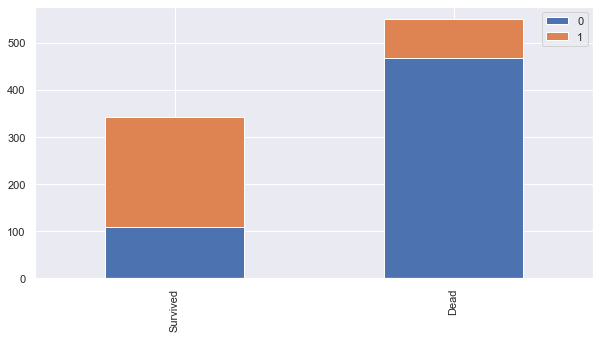

In [114]:
bar_chart('Sex')

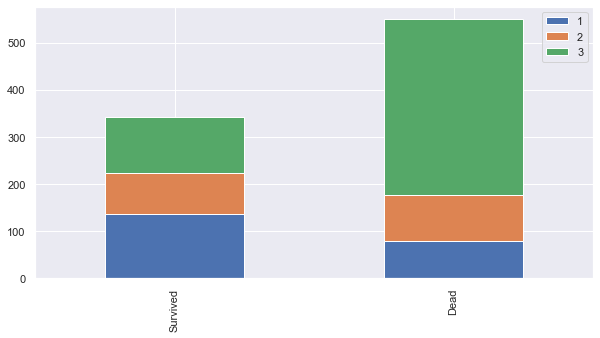

In [12]:
bar_chart('Pclass')

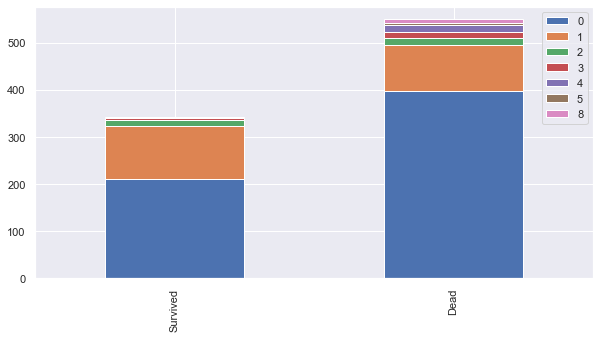

In [13]:
bar_chart('SibSp')

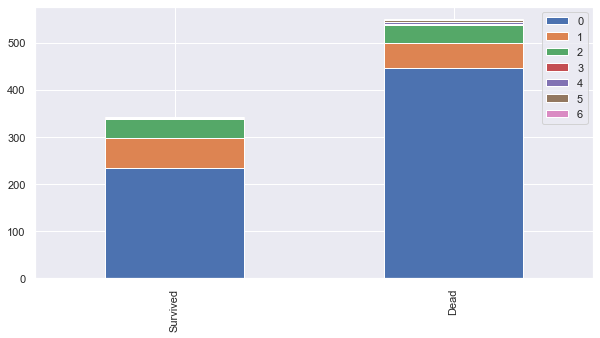

In [14]:
bar_chart('Parch')

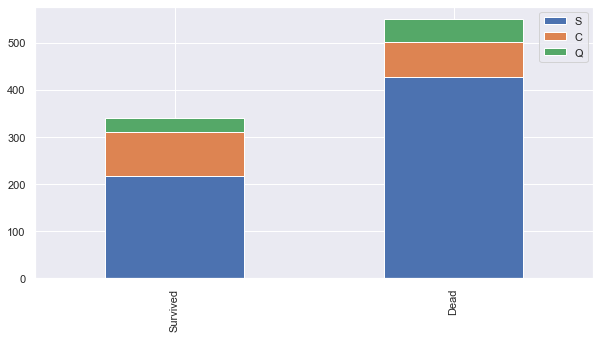

In [15]:
bar_chart('Embarked')

# 4. Feature engineering

Feature Engineering은 데이터에 대한 도메인 지식을 사용하여 기계 학습 알고리즘을 작동시키는 Feature(Feature vectors)를 만드는 과정이다.

feature vector는 어떤 object를 나타내는 숫자 형상의 n차원 벡터다.<br> 
머신 러닝에 있어 많은 알고리즘은 object들의 수치적 표현을 필요로 한다. <br> 
왜냐하면 그러한 표현은 컴퓨터 입장에서 처리와 통계 분석을 용이하게 하기 때문이다.



In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.1 어떻게 타이타닉은 가라앉았나?

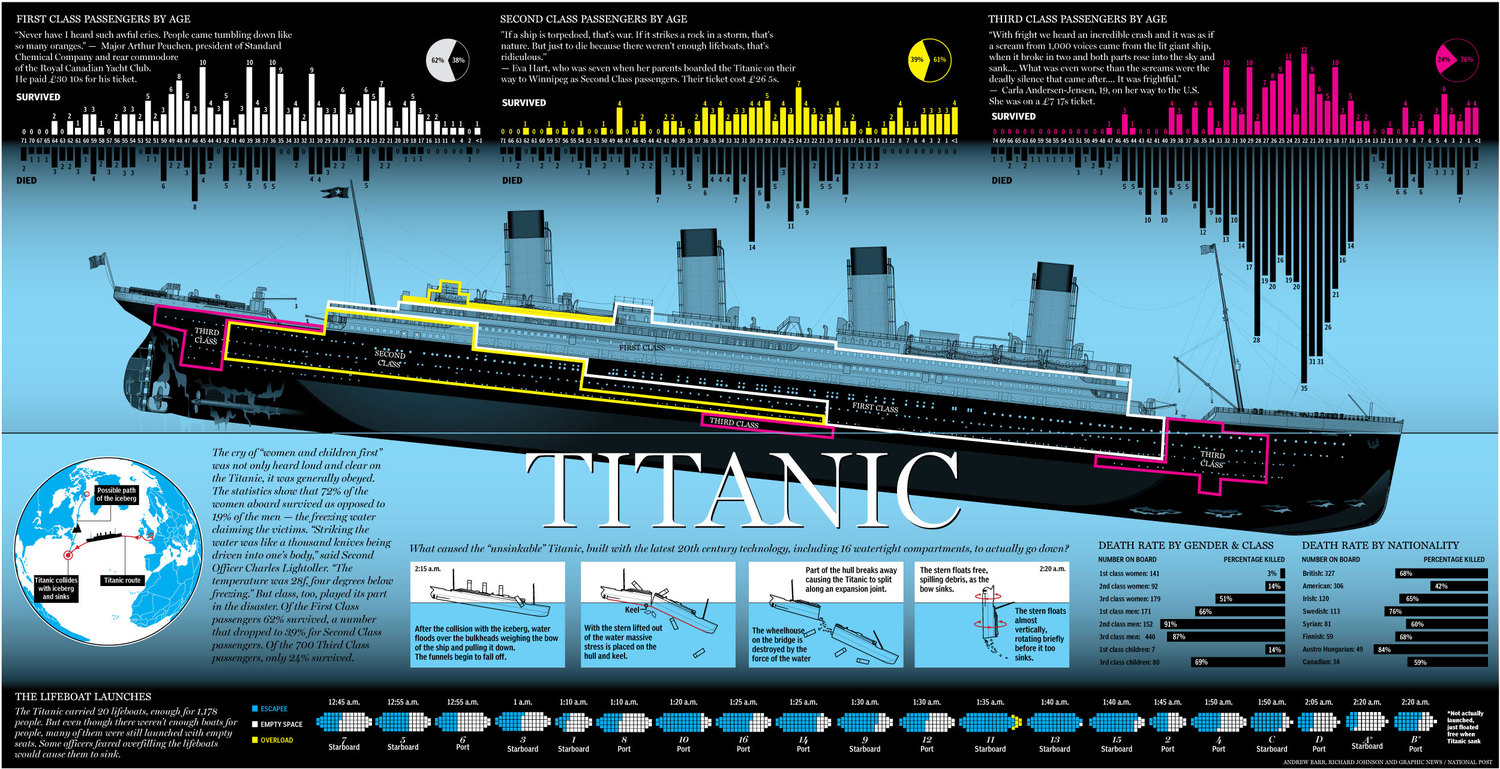

타이타닉이 어떻게 바닷속에 들어갔을까? 위 그림에서 타이타닉의 머릿부분인 오른쪽 뱃머리가 빙하에 부딧히면서 바다에 잠기게 된다. 그러면서 그 부분에 있던 3등급 칸이 가장 먼저 잠기면서 사람들이 많이 죽게 되었다. 반면 반대쪽 3등급 칸은 시간이 더 있었을테니 살아남을 가능성이 더 있었을 것이다. 그리고 1,2등급은 생존하기에 더 좋은 위치이다. 그렇기 때문에 티켓의 등급은 생존 유무를 구하는 좋은 변수이다.

In [74]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


제일 먼저 볼 feature는 name이다. name에 따라서 사람이 죽었다 살았다 판단하지는 못할 것이다. 그렇지만 남성과 여성을 나타내는 Mr., Miss, Mrs. 와 같은 중요한 정보가 있다. 이름에서 이 타이틀 들을 빼 내고 이름 항목을 삭제할 것이다.

## 4.2 Name

In [71]:
train_test_data = [train, test] #훈련 및 시험 데이터 세트 결합


In [72]:
# train_test_data[0]
# train_test_data[1]
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [73]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
                                                   

dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


이름에서 Mr., Miss., Mrs.만 빼 내겠다

In [12]:
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Mme           1
Jonkheer      1
Capt          1
Ms            1
Sir           1
Don           1
Lady          1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

각 호칭을 숫자에 매핑 시키자.
위에서 훈련 및 시험 데이터 세트를 결합했기 때문에 두 데이터 세트를 한번에 바꿔줄 수 있다.

**Title map**

Mr: 0 <br>
Miss: 1 <br>
Mrs: 2 <br>
Others: 3 <br>

In [74]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [75]:
test.head()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [76]:
bar_chart('Title')

NameError: name 'bar_chart' is not defined

데이터에서 Name에 대한 항목을 Title로 변경해 주었으므로 train과 test dataset에서 삭제해주자.

In [77]:
# 데이터 셋에서 불필요한 feature 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## 4.3 Sex

male: 0 <br> 
female:1

남자인지 연자인지 이미 명확히 구분되어 있는 정보로 텍스트를 숫자로만 변환시키자.

In [79]:
sex_mapping = {"male": 0, "female":1}

for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [82]:
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,28.5,0,0,A.5. 3236,8.0500,NaN,S,0.0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
416,1308,3,0,28.5,0,0,359309,8.0500,NaN,S,0.0


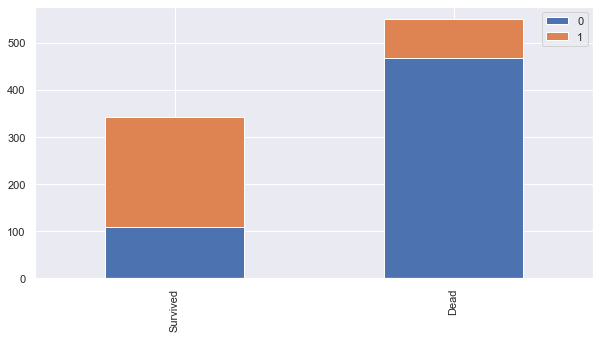

In [87]:
bar_chart('Sex')

## 4.4 Age
다음 나이인데 여기서 주의할 점은 중간중간에 빠진 정보가 존재한다는 사실이다.<br>
이런 missing information에 대해서는 과학적인 방법을 이용해서 채워줘야 한다.<br>
가장 기본적인 생각으로는 나머지 모든 사람의 나이의 평균을 구해 채워주는 방법이다.<br>

다른 논리적인 방법이 있다면 본인이 판단하에 적절한 방법을 사용해서 채워주자

In [81]:
# Missing Age를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

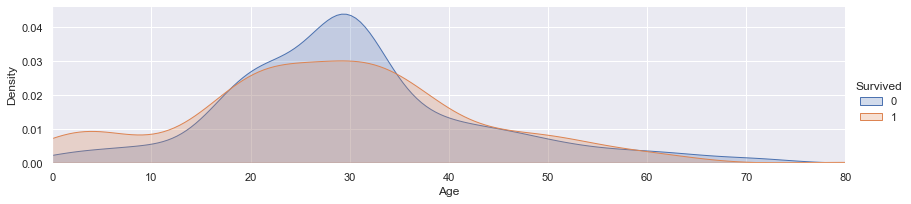

In [29]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

나이를 그대로 그래프 차트에 넣으면 0살부터 80살까지 너무 많은 정보가 들어있다. <br>
그래서 feature engineering에서 Binning이라는 기술이 있는데, 이렇게 잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법이다.
즉,
    - 0~16살 : 0
    - 17~26살 : 1
    - 27~36살 : 2
    - 37~62살 : 3
    - 62살~ : 4
    
로 변환한다.|    

In [83]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [84]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


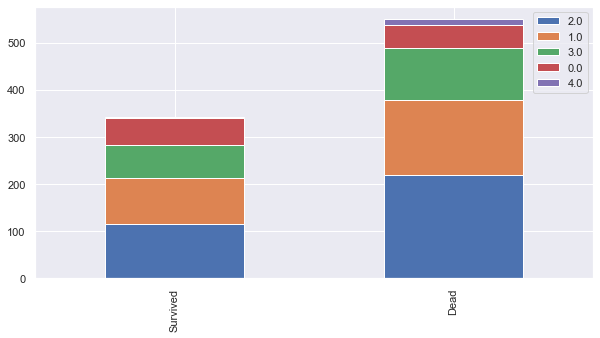

In [88]:
bar_chart('Age')

0에 해당하는 16세 아이들의 경우 다른 그룹보다 생존률이 높음을 확인할 수 있다. <br>
4에 해당하는 62세 이상의 어르신들은 사망률이 아주 높다는 것을 확인할 수 있다. <br>
이렇게 Age information을 binning이라는 테크닉을 이용하여 좀 더 이해하기 쉽게 그래프로 보일 수 있고, classifier 하는데 조금 더 쉽게 예측할 수 있다.

## 4.5 Embarked

도시별로 부유한 사람과 가난한 사람의 비율의 차이가 있지 않을까?

<AxesSubplot:>

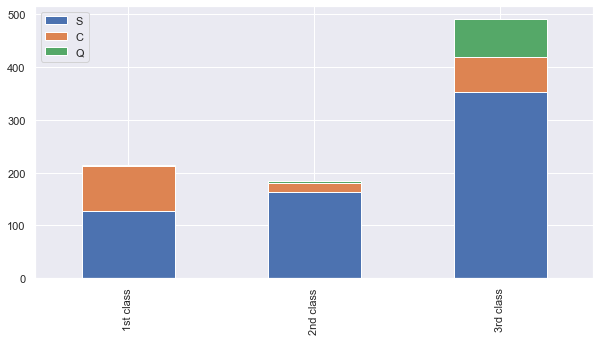

In [89]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

Embarked 정보가 없으면 S를 집어넣자

In [90]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


그리고 머신러닝 classifier를 위해 텍스트를 숫자로 바꿔주자.

In [36]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

# 6 Fare
티켓 가격이 안채워져 있을때는 어떻게 채울 수 있을까? <br>
티켓 가격은 클래스과 관련이 높다. <br>
그리고 클래스는 missing value가 존재하지 않았다. <br> 
그러므로 각 클래스의 티켓 가격 가운데 값을 티켓 가격의 missing value에 넣어주겠다.

In [37]:
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

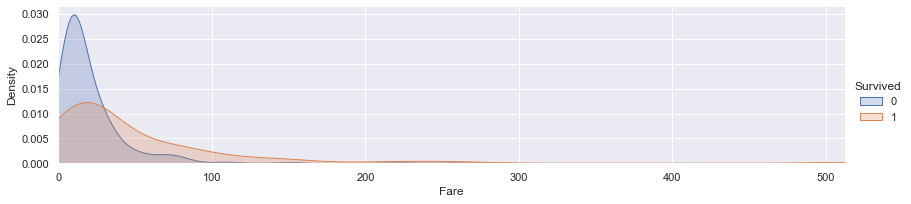

In [38]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

싼 티켓을 구매한 사람은 사망률이 높고 비싼 티켓을 구매한 사람은 생존률이 높다는 것을 알 수 있다.<br>
binning을 사용하여 각 구간별로 티켓 가격을 카테고리에 넣어주자.
    - 0~17 : 0
    - 18~30 : 1
    - 31~100 : 2
    - 101~ : 3

In [92]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [93]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,0.0,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,0.0,C123,S,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0


## 4.7 Cabin

In [94]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
C106           1
C54            1
B37            1
D45            1
C111           1
Name: Cabin, Length: 147, dtype: int64

알파벳으로 시작하고 숫자가 나오는 형태를 띠고 있다. 숫자는 핸들링 하기 어려워서 캐릭터만 가지고 해보자.

In [95]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

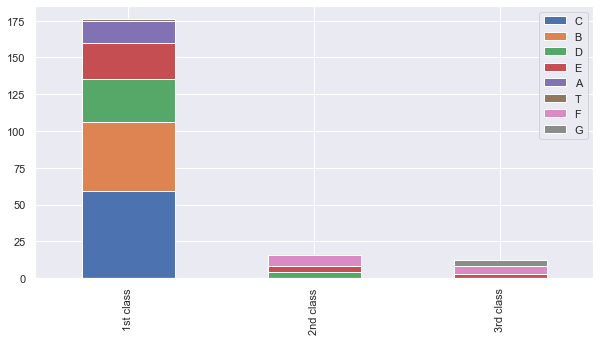

In [96]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

1등급에는 ABCDET, 2등급에는 DEF, 3등급은 EFG로 구성되어 있다.
이것을 classifier를 위해 매핑시켜주자.

In [45]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계가 있기 때문에 각 클래스별 cabin의 중간값을 missing value에 넣어주도록 한다.

In [46]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

## 4.8 FamilySize
함께 동승한 부모님과 아이들의 수와 형제와 배우자의 수의 사망률에 대해 관계가 유사하였고, 궁금한 점은 혼자 탔는지 함께 탔는지가 궁금하기때문에 SibSb 데이터와 Parch 데이터를 합쳐 하나의 값을 만드는 것도 괜찮을 것 같다

In [98]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

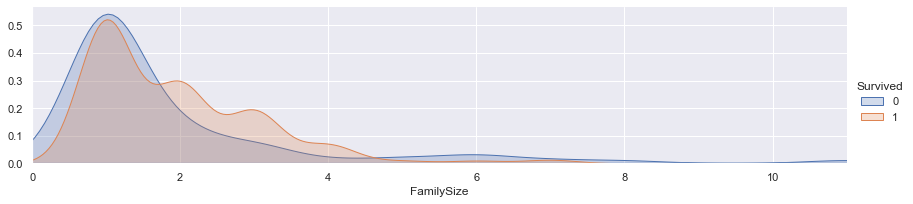

In [99]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

혼자 탔을경우 상당히 많이 죽었음을 알 수 있다. <br>
반면 가족이 한명이라도 있을경우 사망률이 많이 줄어들었다는 것을 확인할 수 있다.

이 정보들도 숫자에 mapping해서 넣어주자.

In [100]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [101]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,0.0,C,C,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,0.0
3,4,1,1,1,2.0,1,0,113803,0.0,C,S,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0,0.0


Ticket 데이터와 SibSp와 Parch는 필요한 정보가 아니므로 빼 주자.

In [104]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [106]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [105]:
train_data.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0,0.4
1,2,1,1,3.0,1,0,PC 17599,0.0,C,C,2,0.4
2,3,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,0.0
3,4,1,1,2.0,1,0,113803,0.0,C,S,2,0.4
4,5,3,0,2.0,0,0,373450,0.0,NaN,S,0,0.0
5,6,3,0,2.0,0,0,330877,0.0,NaN,Q,0,0.0
6,7,1,0,3.0,0,0,17463,0.0,E,S,0,0.0
7,8,3,0,0.0,3,1,349909,0.0,NaN,S,3,1.6
8,9,3,1,2.0,0,2,347742,0.0,NaN,S,2,0.8
9,10,2,1,0.0,1,0,237736,0.0,NaN,C,2,0.4


전처리한 training/test 데이터를 csv 파일로 저장

In [54]:
train_data.to_csv('data/titanic/train_preprocessing.csv')
test.to_csv('data/titanic/test_preprocessing.csv')
target.to_csv('data/titanic/target_preprocessing.csv')

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": res
})

submission.to_csv('submission.csv', index=False)